In [ ]:
from fastai.vision import*


In [ ]:
folder = 'Hedgehogs'
file = 'Hedgehogs.txt'

In [ ]:
folder = 'Porcupines'
file = 'Porcupines.txt'

In [ ]:
path = Path('data/Animals')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
path.ls()

[PosixPath('data/Animals/Hedgehogs')]

In [ ]:

classes = ['Hedgehogs','Porcupines']

In [ ]:
download_images(path/file, dest, max_pics=600)

In [ ]:

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes


['Hedgehogs', 'Porcupines']

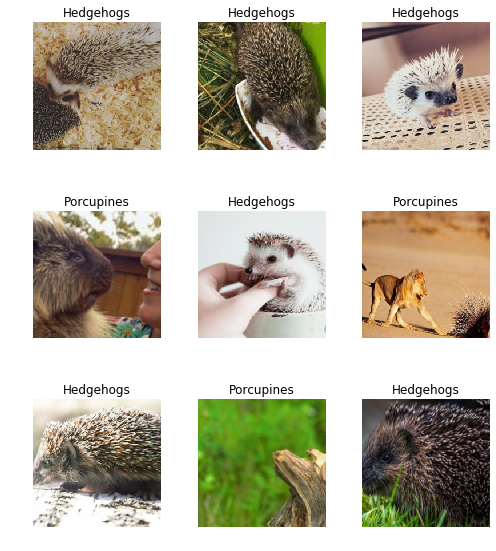

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Hedgehogs', 'Porcupines'], 2, 848, 212)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 113MB/s] 


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.643972,0.181639,0.051887,00:16
1,0.406127,0.171326,0.047170,00:15
2,0.304065,0.155853,0.047170,00:15
3,0.230799,0.149077,0.047170,00:15


In [ ]:
learn.save('stage-1')

In [ ]:
learn.load('stage-1');

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


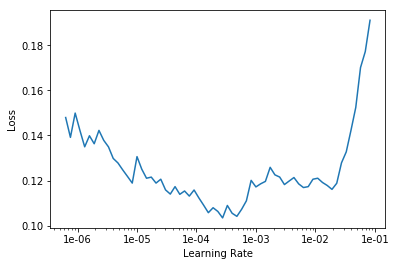

In [ ]:
learn.recorder.plot()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

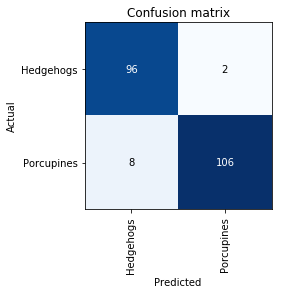

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
from fastai.widgets import *

In [ ]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [ ]:

learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-1');

In [ ]:

ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [ ]:
learn.export()

In [ ]:

defaults.device = torch.device('cpu')

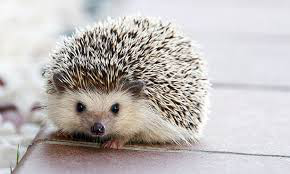

In [ ]:
img = open_image(path/'Testimg.jpeg')
img

In [ ]:

learn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Hedgehogs